In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
run -im djd.main -- --dbname=dj_lisa -r

For remote access to work, make sure to first open an SSH tunnel with MySQL
port forwarding. Run the `djdtunnel` script in a separate terminal, with
optional `--user` argument if your local and remote user names differ.
Or, open the tunnel manually with:
  ssh -NL 3306:huxley.neuro.bzm:3306 -p 1021 USERNAME@tunnel.bio.lmu.de
Connecting execute@localhost:3306
Connected to database 'dj_lisa' as 'execute@10.153.172.3'
For remote file access to work, make sure to first mount the filesystem at tunnel.bio.lmu.de:1021 via SSHFS with `hux -r`


In [4]:
from djd import glms
from djd import hmov_unit

# Get critical set of units

In [6]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)
len(keys_crit)

93

# Compare RF size & regularization

In [7]:
rf_areas = []
reg_consts = []

for key in keys_crit:
    bm = glms.get_best_model(key, model_type='SplineLNP', crit='spl_r_val', groupby=['m','s','u'],
                   opto_config='True', opto_len='_', run_config='True', run_len='_',
                   eye_config='True', eye_len='_', pshf_config='False', paramset_ids=None,
                   key_only=True, format='dict',
                   verbose=True)
    rf_area = (SplineLNP.Eval() & bm).fetch1('spl_rf_area')
    reg_const = (SplineLNPParams() & bm).fetch1('spl_lambda')
    
    rf_areas.append(rf_area)
    reg_consts.append(reg_const)

In [8]:
import matplotlib.colors

colormap = 'husl'
sns_cmap = sns.color_palette(colormap, 8).as_hex()
cmap = matplotlib.colors.ListedColormap(sns_cmap)

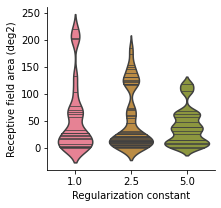

In [9]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
sns.violinplot(reg_consts, rf_areas, ax=ax, palette=sns_cmap,  inner="stick", bw=.2)
ax.set_ylabel('Receptive field area (deg2)')
ax.set_xlabel('Regularization constant')

sns.despine()

fig.patch.set_facecolor('white')
#fig.savefig('./plots/RF_area_vs_reg_const.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)